# <span style='color:OrangeRed'>V4 REGELALGORITHMEN FÜR DIE DIGITALE REGELUNG  - TEIL 1</span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Vorschubregelung einer Werkzeugmaschine hat die dargestellte Kaskadenstruktur:

In [6]:
% Necessary to use control toolbox
pkg load control
clear all

<img src="figures/Schema.png">

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Regelstrecke GS1(s) wird als PT1-Glied mit der Verstärkung K1 = 10 und der
Zeitkonstante T1 = 0,25 sec definiert.
Die Regelstrecke GS2(s) wird als PT1-Glied mit der Verstärkung K2 = 10 und der
Zeitkonstante T2 = 2,5 sec beschrieben.
Die Abtastzeit beträgt Ts = 0,01 sec.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Es wird zunächst der innere Regelkreis, d.h. der Geschwindigkeitsregelkreis,
betrachtet.
a1) Bestimmen Sie die zeitdiskrete Übertragungsfunktion HG1(z) für die Regelstrecke
GS1(s). Es wird ein Halteglied nullter Ordnung angenommen.

In [7]:
K1 = 10 
tau1 = 0.25;


Num = [K1];
Den = [tau1 1];

Gs1 = tf(Num,Den)

K1 =  10

Transfer function 'Gs1' from input 'u1' to output ...

          10    
 y1:  ----------
      0.25 s + 1

Continuous-time model.


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Diskretisierung mit Halteglied (zoh)

In [8]:
Ts = 0.01

G1z = c2d(Gs1,Ts,'zoh')

Ts =  0.010000

Transfer function 'G1z' from input 'u1' to output ...

        0.3921  
 y1:  ----------
      z - 0.9608

Sampling time: 0.01 s
Discrete-time model.


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Im Geschwindigkeitsregelkreis wird ein digitaler PI-Regler eingesetzt.
Bestimmen Sie die Parameter Kp und Ki des digitalen PI-Reglers durch Anwendung
des vereinfachten Nyquist-Kriteriums, sodass die Phasenreserve des offenen
Regelkreises 60  beträgt. Die Durchtrittsfrequenz beträgt om  = 7,2 rad/sec. Eine
quasi-kontinuierliche Darstellung des Geschwindigkeitsregelkreises ist nicht möglich.

In [15]:
omb = 7.2
fim = 60

[Gw fi] = bode(G1z,omb)
th = -180+fim-fi

Kp = cos(th*pi/180)/Gw
Ki = -sin(th*pi/180)*omb/Gw


omb =  7.2000
fim =  60
Gw =  4.8575
fi = -63.022
th = -56.978
Kp =  0.11219
Ki =  1.2428


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Discretisierung mach Tustin

In [16]:
KiT = Ki*Ts/2

n1 = Kp+KiT
n2 = KiT-Kp

Gr1 = tf([n1 n2],[1 -1], Ts)

KiT =  0.0062141
n1 =  0.11840
n2 = -0.10598

Transfer function 'Gr1' from input 'u1' to output ...

      0.1184 z - 0.106
 y1:  ----------------
           z - 1      

Sampling time: 0.01 s
Discrete-time model.


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Bestimmen Sie die Übertragungsfunktion des geschlossenen Geschwindigkeitsregelkreises

In [17]:
Gcl = G1z*Gr1/(1+G1z*Gr1)
Gcl = minreal(Gcl)


Transfer function 'Gcl' from input 'u1' to output ...

      0.04643 z^3 - 0.1326 z^2 + 0.1261 z - 0.03992 
 y1:  ----------------------------------------------
      z^4 - 3.875 z^3 + 5.634 z^2 - 3.642 z + 0.8832

Sampling time: 0.01 s
Discrete-time model.

Transfer function 'Gcl' from input 'u1' to output ...

       0.04643 z - 0.04155  
 y1:  ----------------------
      z^2 - 1.914 z + 0.9192

Sampling time: 0.01 s
Discrete-time model.


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Begründen Sie, weshalb der geschlossene Regelkreis mit der Übertragungsfunktion
HGges(z) ein Überschwingen aufweist. Bestimmen Sie das prozentuale Überschwingen
des geschlossenen Geschwindigkeitsregelkreises in Bezug auf die Führungsgröße.

In [18]:
p1 = roots(cell2mat(Gcl.den))

p1 =

   0.95718 + 0.05513i
   0.95718 - 0.05513i



In [19]:
r = abs(p1(1))
thc = arg(p1(1))

csi = -log(r)/sqrt((log(r))^2+thc^2)
over = exp(-csi*pi/sqrt(1-csi^2))*100

r =  0.95877
thc =  0.057536
csi =  0.59057
over =  10.035


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Sprungantwort des Regelkreises

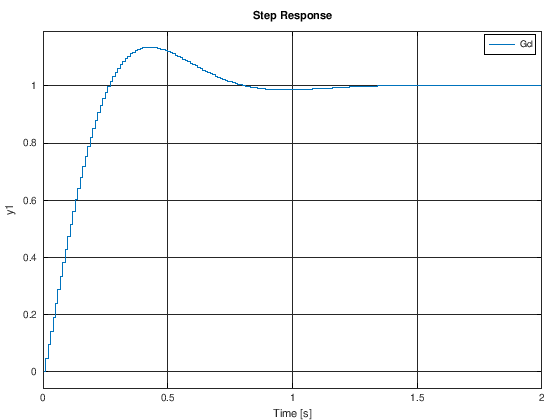

In [20]:
step(Gcl)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Nun wird der Lageregelkreis, d.h. der äußere Regelkreis, betrachtet.

In [21]:
K2 = 10 
tau2 = 2.5;


Num = [K2];
Den = [tau2 1];

Gs2 = tf(Num,Den)
G2z = c2d(Gs2,Ts,'zoh')


K2 =  10

Transfer function 'Gs2' from input 'u1' to output ...

         10    
 y1:  ---------
      2.5 s + 1

Continuous-time model.

Transfer function 'G2z' from input 'u1' to output ...

       0.03992 
 y1:  ---------
      z - 0.996

Sampling time: 0.01 s
Discrete-time model.


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Zunächst wird GR2(z) als P-Regler angenommen, d.h. GR2(z) = KR2. Bestimmen
Sie den Bereich für die Verstärkung KR2 des Reglers so, dass für die Amplitudenreserve
AR des offenen Regelkreises der Lageregelung 5 < AR < 7  gilt

In [22]:
Ar1 = 5
Ar2 = 7

Gopen = G2z*Gcl
Gopen = minreal(Gopen)
[gm,fm,omm,omf] = margin(Gopen)


Gop = bode(Gopen,omm)
 


Kpmax = 1/(Ar1*Gop)
Kpmin = 1/(Ar2*Gop)



Ar1 =  5
Ar2 =  7

Transfer function 'Gopen' from input 'u1' to output ...

            0.001853 z - 0.001659      
 y1:  ---------------------------------
      z^3 - 2.91 z^2 + 2.826 z - 0.9156

Sampling time: 0.01 s
Discrete-time model.

Transfer function 'Gopen' from input 'u1' to output ...

            0.001853 z - 0.001659      
 y1:  ---------------------------------
      z^3 - 2.91 z^2 + 2.826 z - 0.9156

Sampling time: 0.01 s
Discrete-time model.
gm =  5.3814
fm =  63.634
omm =  11.891
omf =  4.4885
Gop =  0.18582
Kpmax =  1.0763
Kpmin =  0.76878


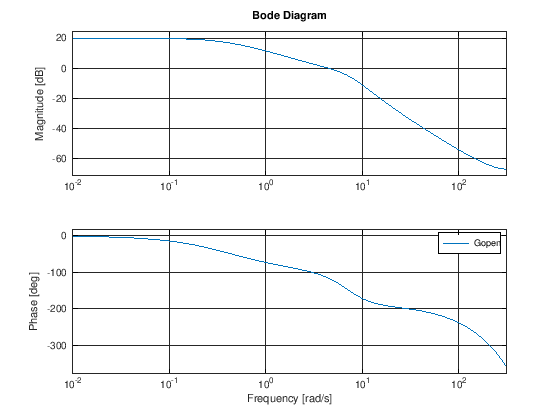

In [23]:
bode(Gopen)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Als Regler GR2 soll nun ein digitaler P-Regler zum Einsatz kommen.
Entwurf nach Ziegler-Nichols

In [24]:
Kkrit = 1/(Gop)

Tkrit = 2*pi/omm

Kkrit =  5.3814
Tkrit =  0.52841


In [25]:
Kr2 = 0.5*Kkrit

Kr2 =  2.6907


In [26]:

Gr2 = Kr2

Gr2 =  2.6907


In [27]:
Gcl2 = Gr2*Gopen/(1+Gr2*Gopen)
Gcl2 = minreal(Gcl2)


Transfer function 'Gcl2' from input 'u1' to output ...

         0.004987 z^4 - 0.01898 z^3 + 0.02708 z^2 - 0.01718 z + 0.004087   
 y1:  ---------------------------------------------------------------------
      z^6 - 5.821 z^5 + 14.13 z^4 - 18.3 z^3 + 13.34 z^2 - 5.192 z + 0.8423

Sampling time: 0.01 s
Discrete-time model.

Transfer function 'Gcl2' from input 'u1' to output ...

           0.004987 z - 0.004463     
 y1:  -------------------------------
      z^3 - 2.91 z^2 + 2.831 z - 0.92

Sampling time: 0.01 s
Discrete-time model.


In [28]:
p2 = roots(cell2mat(Gcl2.den))

p2 =

   0.98696 + 0.09151i
   0.98696 - 0.09151i
   0.93646 + 0.00000i



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Sprungantwort des Regelkreises

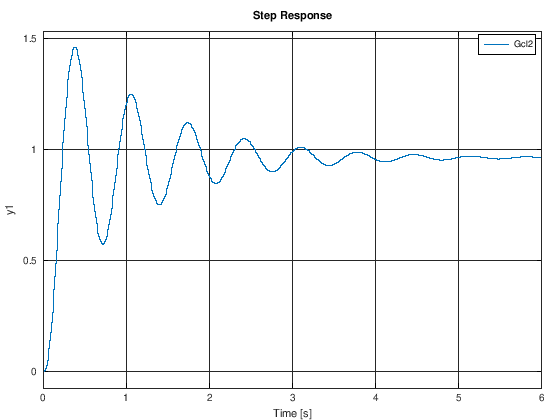

In [29]:
step(Gcl2)